# Introduction to Random Distributions

> Correctly called random variable, these random variable are usefull in hyperparameter tuning.  

For each hyperparmeter, a range can be defined, that is, a statistical distribution, which makes the hyperparameter a random variable.
This random variable will defined what value the hyperparameter is likely to take. 

Let's explore the hyperparameter distributions, by plotting the following graph :
    - Probability distribution function (pdf) or probability mass function (pmf)
    - Cumulative distribution function (cdf)
    - Histogram of sampling. 

## Plotting Each Hyperparameter Distribution

Let's import plotting functions, and neuraxle hyperparameter classes. 

In [1]:
from neuraxle.hyperparams.distributions import *
from neuraxle.hyperparams.space import HyperparameterSpace
from neuraxle.plotting import plot_histogram, plot_pdf_cdf, plot_distribution_space
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

DISCRETE_NUM_BINS = 40
CONTINUOUS_NUM_BINS = 1000
NUM_TRIALS = 100000
X_DOMAIN = np.array(range(-100, 600)) / 100

## Discrete Distributions

- Here are now the discrete standard distributions, which sample discrete value or categories.
- For example, Boolean distribution gives either true or false.

### RandInt

randint:


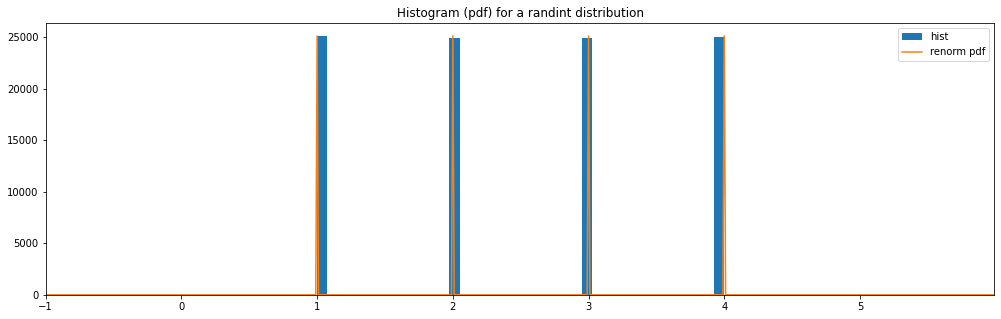

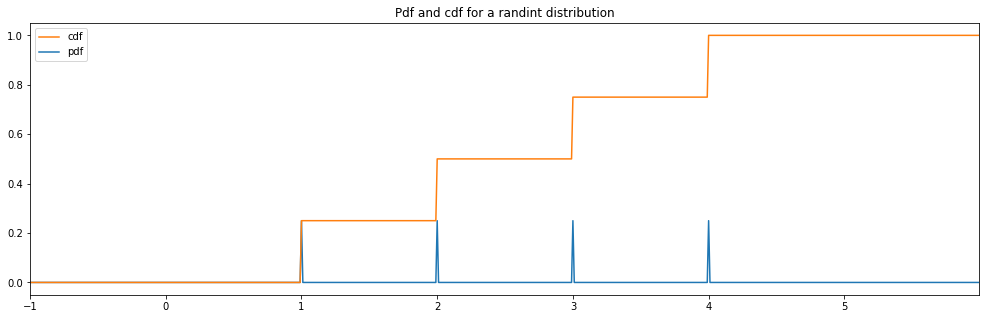

In [2]:
discrete_hyperparameter_space = HyperparameterSpace({
    "randint": RandInt(1, 4)
})

plot_distribution_space(discrete_hyperparameter_space, num_bins=DISCRETE_NUM_BINS)


### Boolean

boolean:


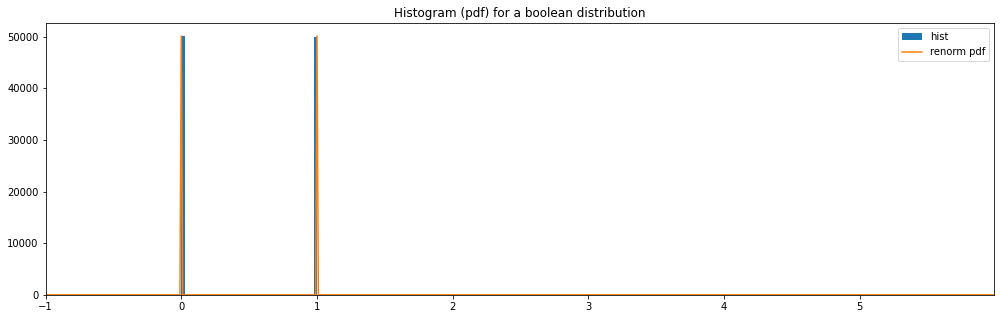

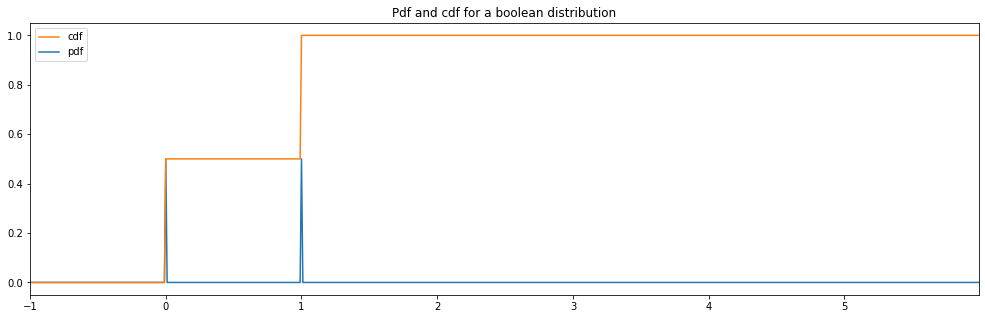

In [3]:
discrete_hyperparameter_space = HyperparameterSpace({
    "boolean": Boolean()
})
plot_distribution_space(discrete_hyperparameter_space, num_bins=DISCRETE_NUM_BINS)

### Choice

choice:


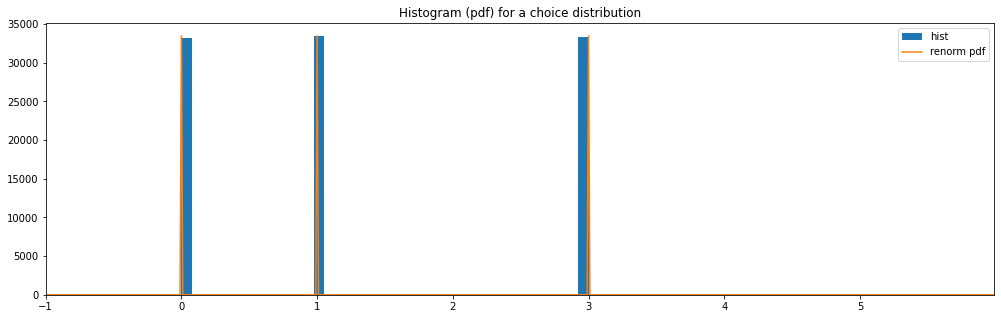

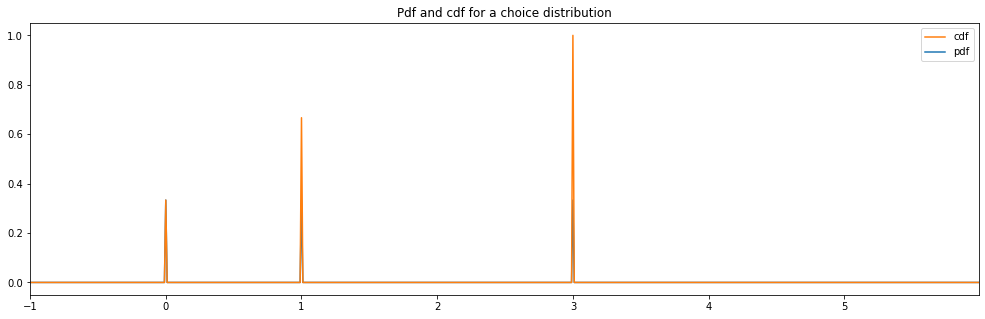

In [4]:
discrete_hyperparameter_space = HyperparameterSpace({
    "choice": Choice([0, 1, 3])
})
plot_distribution_space(discrete_hyperparameter_space, num_bins=DISCRETE_NUM_BINS)

### Priority Choice

priority_choice:


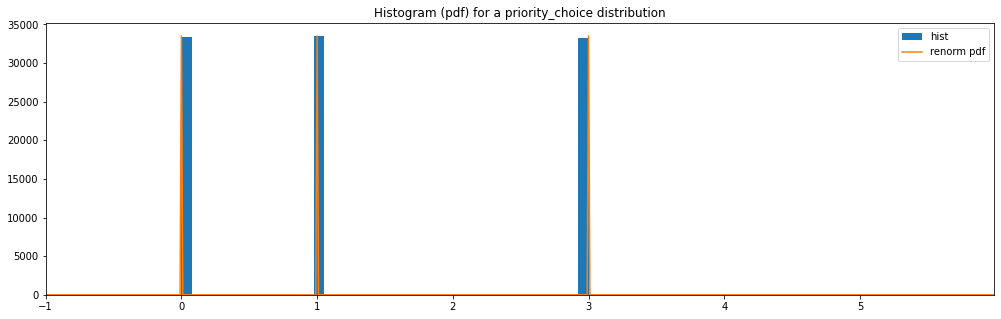

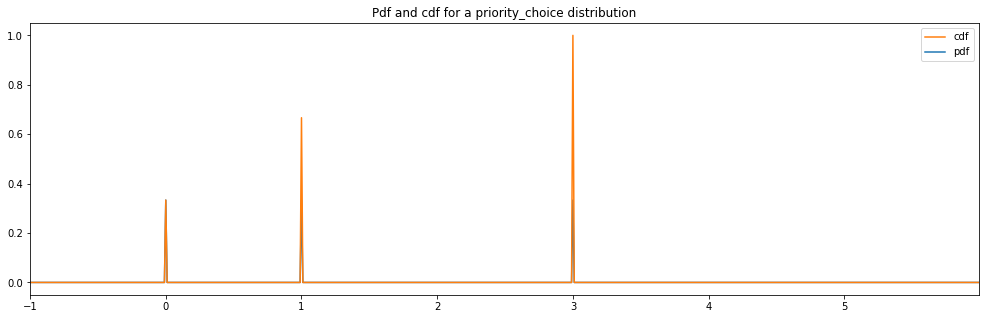

In [5]:
discrete_hyperparameter_space = HyperparameterSpace({
    "priority_choice": PriorityChoice([0, 1, 3])
})
plot_distribution_space(discrete_hyperparameter_space, num_bins=DISCRETE_NUM_BINS)

## Continuous Distributions

- Here are now the continuous distributions, which sample a continuous range of values. Those are probably the ones you'll most use. 

### Continuous Uniform

uniform:


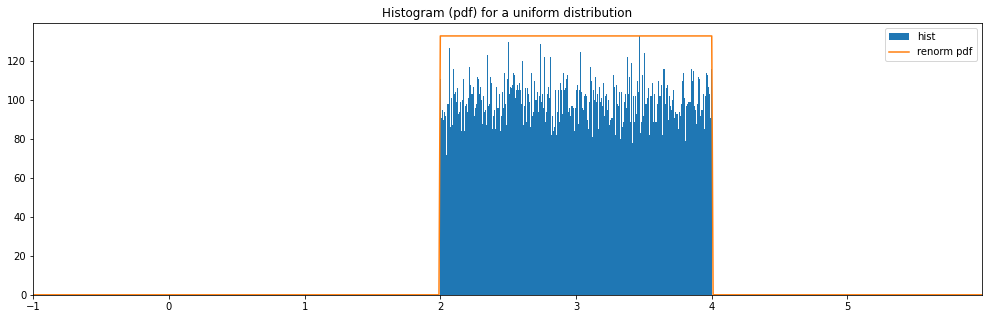

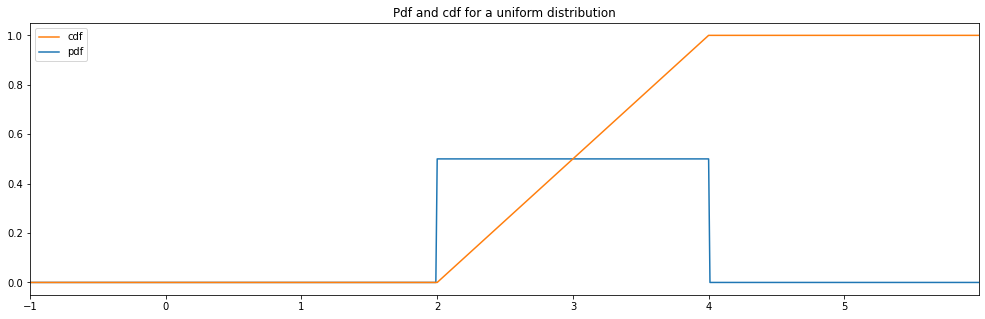

In [6]:
continuous_hyperparameter_space = HyperparameterSpace({
    "uniform": Uniform(2., 4.)
})
plot_distribution_space(continuous_hyperparameter_space, num_bins=CONTINUOUS_NUM_BINS)

### Continuous Loguniform

loguniform:


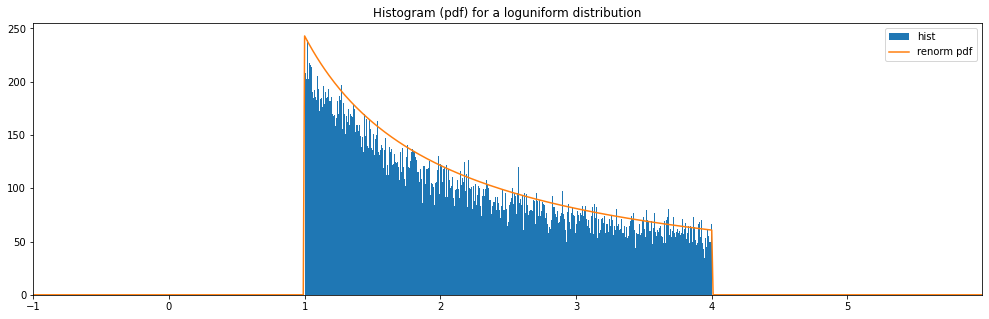

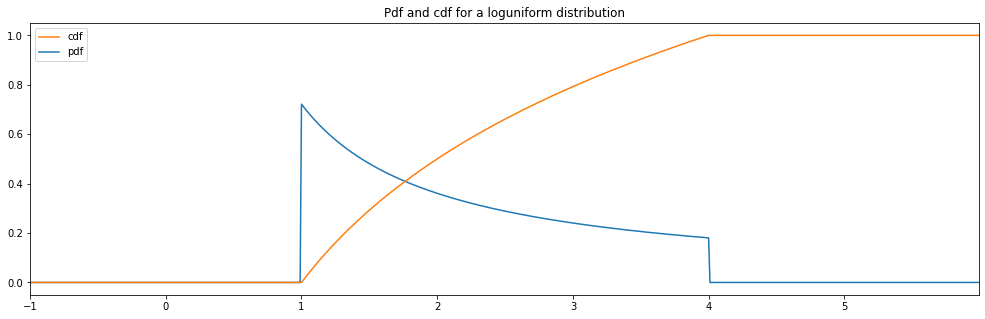

In [7]:
continuous_hyperparameter_space = HyperparameterSpace({
    "loguniform": LogUniform(1., 4.)
})
plot_distribution_space(continuous_hyperparameter_space, num_bins=CONTINUOUS_NUM_BINS)

### Continuous Normal

normal:


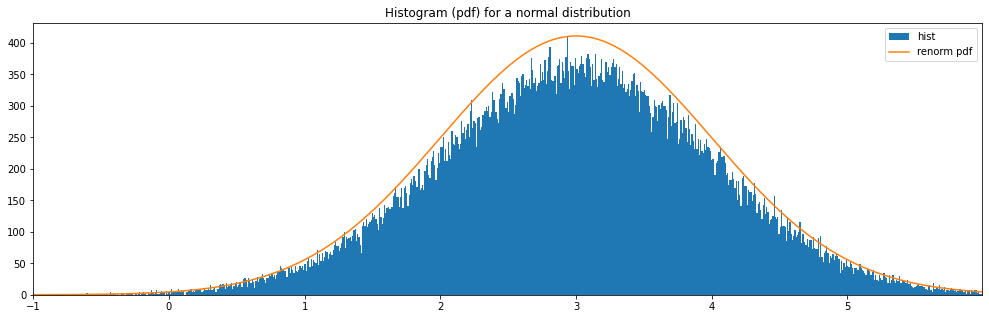

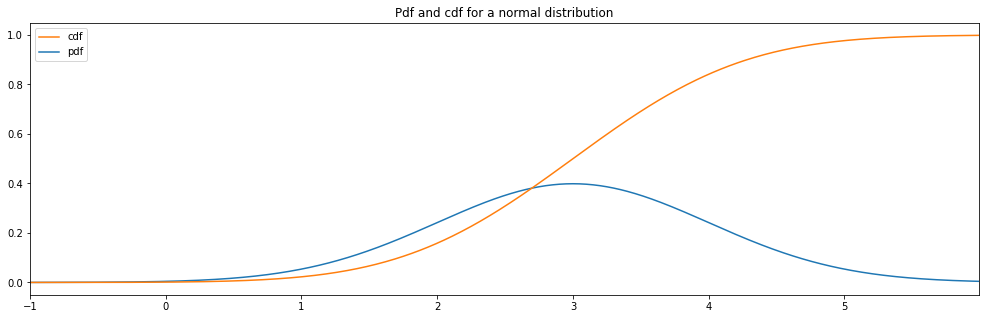

In [8]:
continuous_hyperparameter_space = HyperparameterSpace({
    "normal": Normal(3.0, 1.0)
})
plot_distribution_space(continuous_hyperparameter_space, num_bins=CONTINUOUS_NUM_BINS)

### Continuous Lognormal

lognormal:


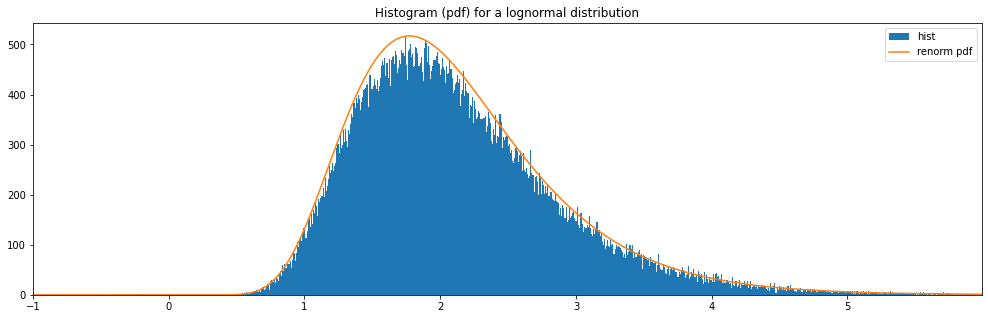

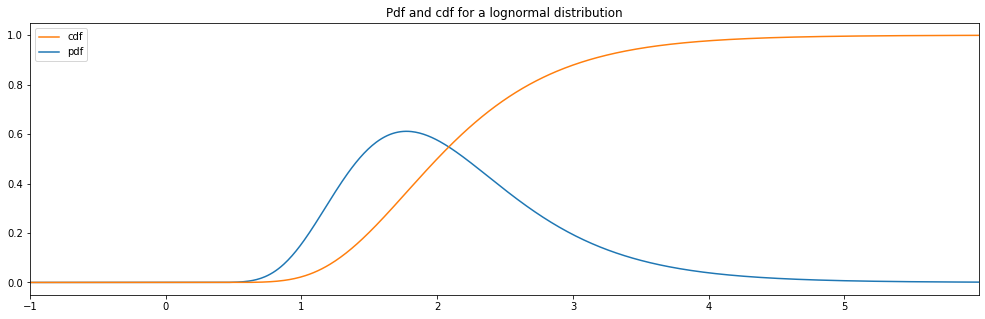

In [9]:
continuous_hyperparameter_space = HyperparameterSpace({
    "lognormal": LogNormal(1.0, 0.5)
})
plot_distribution_space(continuous_hyperparameter_space, num_bins=CONTINUOUS_NUM_BINS)

### Continuous Normal Clipped 

normal_clipped:


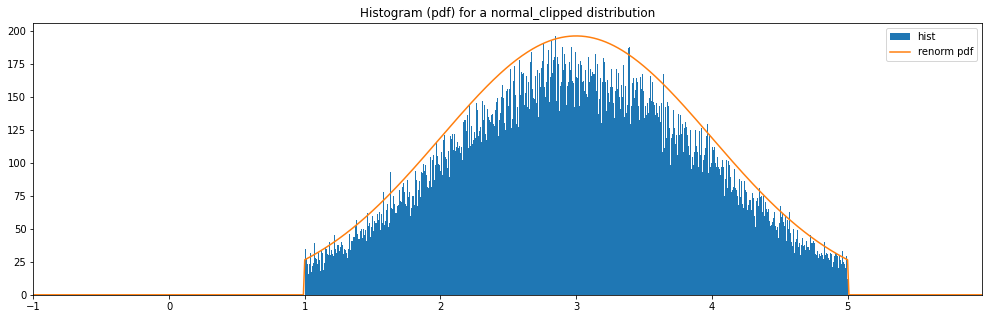

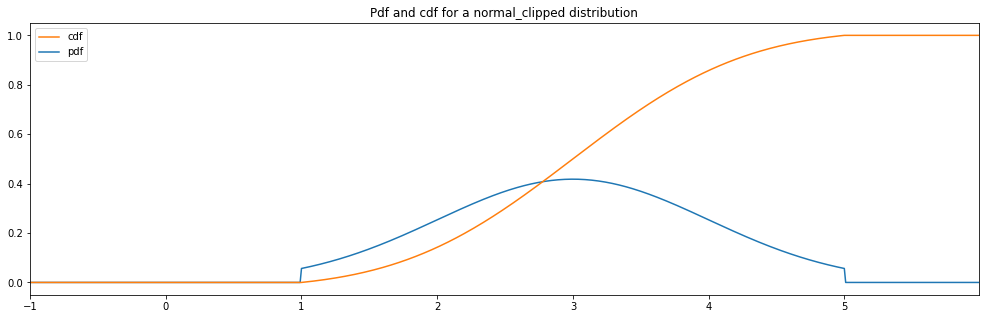

In [10]:
continuous_hyperparameter_space = HyperparameterSpace({
    "normal_clipped": Normal(3.0, 1.0, hard_clip_min=1., hard_clip_max=5.)
})
plot_distribution_space(continuous_hyperparameter_space, num_bins=CONTINUOUS_NUM_BINS)

### Continuous Lognormal Clipped

lognormal_clipped:


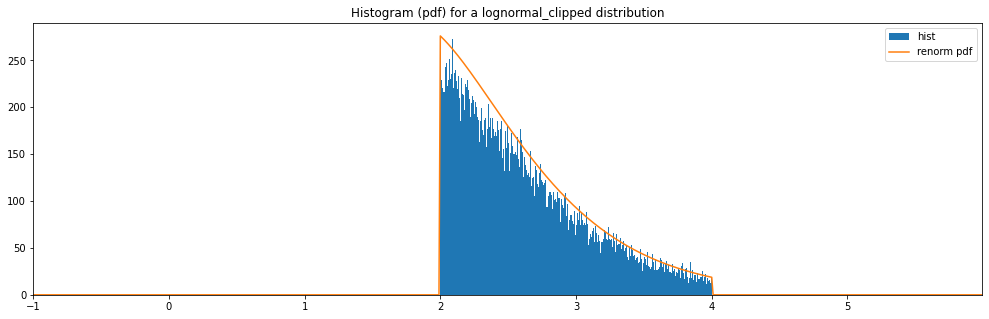

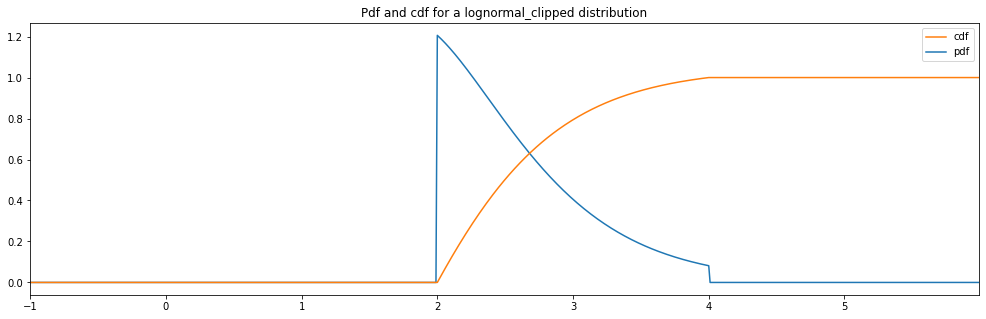

In [11]:
continuous_hyperparameter_space = HyperparameterSpace({
    "lognormal_clipped": LogNormal(1.0, 0.5, hard_clip_min=2., hard_clip_max=4.)
})
plot_distribution_space(continuous_hyperparameter_space, num_bins=CONTINUOUS_NUM_BINS)

## Quantized Hyperparameter Distributions

- Here are now the quantized hyperparameter distributions. Those are distributions that yield integers or other precise specific values. 
- Also, notice how there are border effects to the left and right of the charts when we use `Quantized(...)` as a distribution wrapper to round the numbers. 
- Those weird border effect wouldn't appear if you'd limit the distribution to half numbers instead of plain number. 
- Let's say you have a `Quantized(Uniform(-10, 10))`: then the samples from approximately -9.5 to -8.5 are rounded to 
- The bin of the number -9, but the values from -10 to -9.5 are rounder to the bin -10 and a half is missing, so the -10 
- bin sees its values sampled half as often as -9. That explains the border effect, and you could fix it easily by taking the uniform range from -10.49999 to 10.49999.

### Quantized Uniform

quantized uniform:


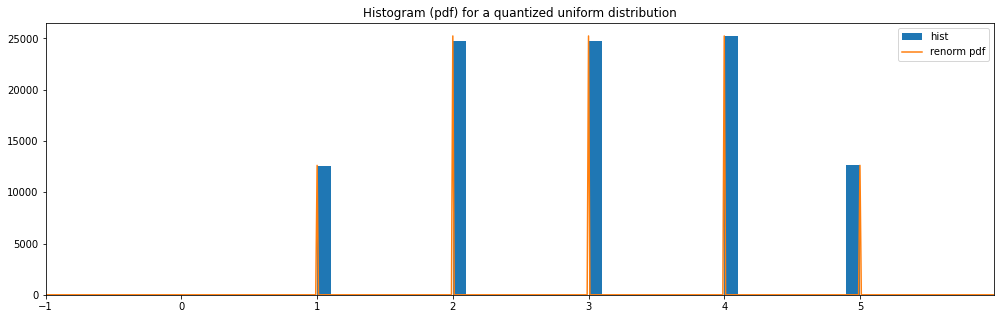

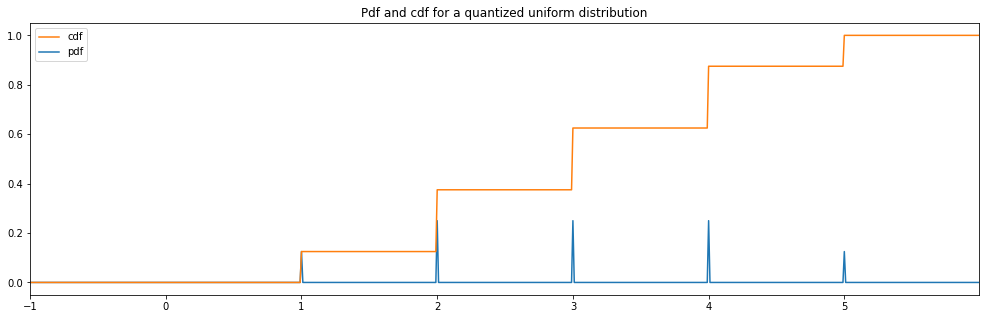

In [12]:
quantized_hyperparameter_space = HyperparameterSpace({
    "quantized uniform": Quantized(Uniform(1., 5.))
})
plot_distribution_space(quantized_hyperparameter_space, num_bins=DISCRETE_NUM_BINS)

### Repaired Quantized Uniform

repaired quantized uniform:


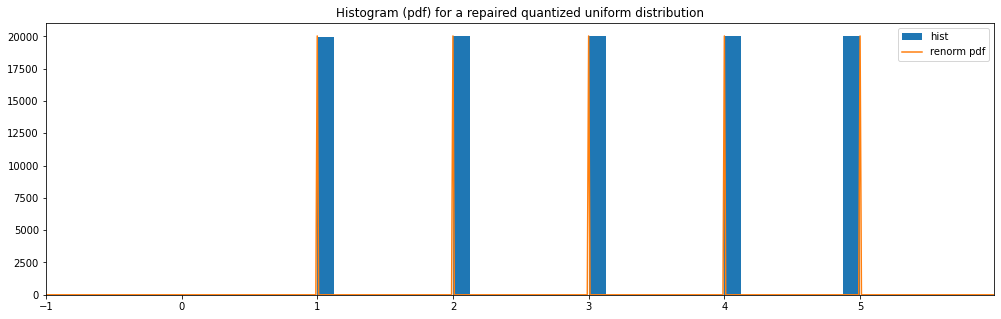

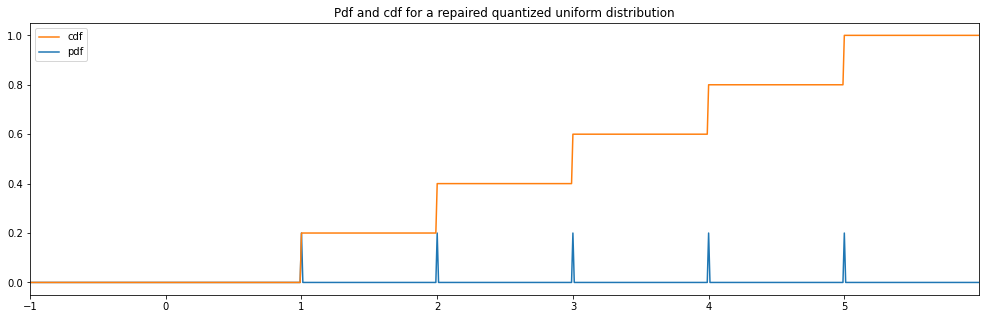

In [13]:
quantized_hyperparameter_space = HyperparameterSpace({
    "repaired quantized uniform": Quantized(Uniform(0.49999, 5.49999))
})

plot_distribution_space(quantized_hyperparameter_space, num_bins=DISCRETE_NUM_BINS)

### Quantized Log Uniform

quantized loguniform:


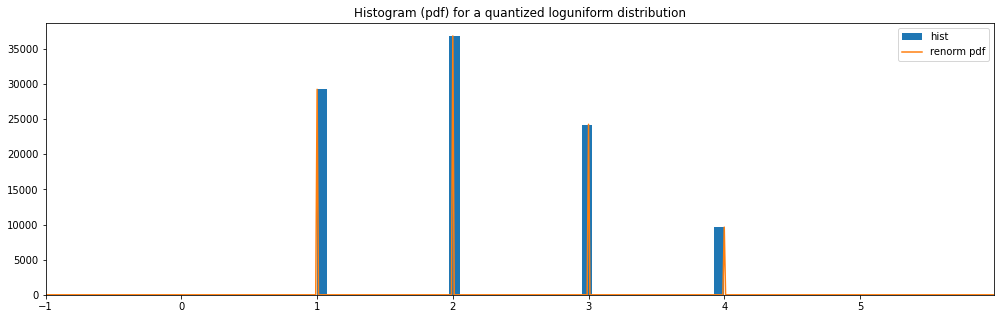

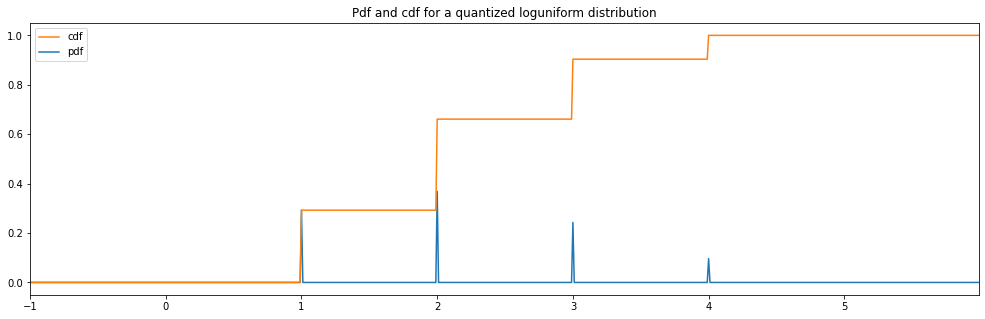

In [14]:
quantized_hyperparameter_space = HyperparameterSpace({
    "quantized loguniform": Quantized(LogUniform(1.0, 4.0))
})

plot_distribution_space(quantized_hyperparameter_space, num_bins=DISCRETE_NUM_BINS)

### Quantized Normal 

quantized normal:


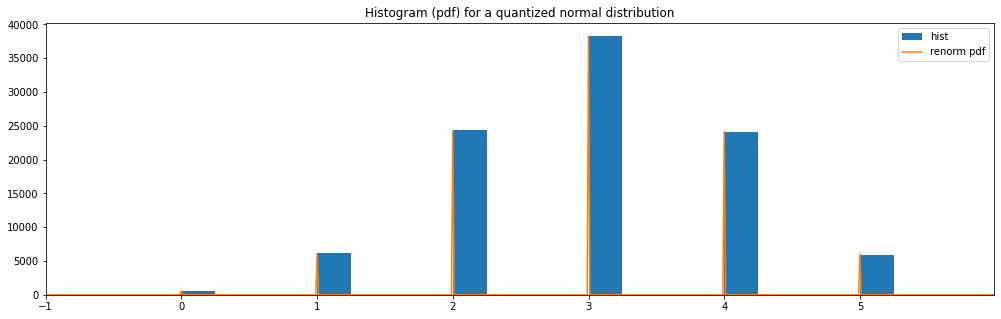

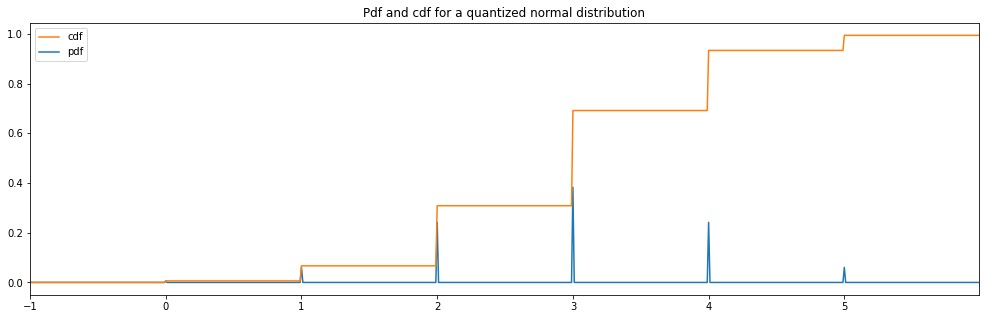

In [15]:
quantized_hyperparameter_space = HyperparameterSpace({
    "quantized normal": Quantized(Normal(3.0, 1.0))
})

plot_distribution_space(quantized_hyperparameter_space, num_bins=DISCRETE_NUM_BINS)

### Quantized Lognormal

quantized lognormal:


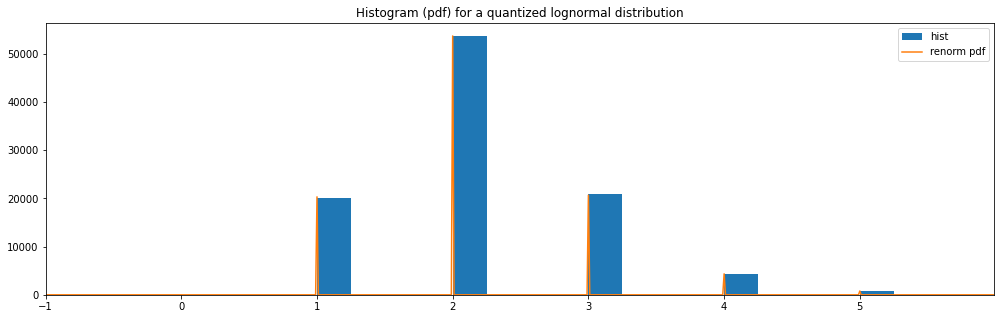

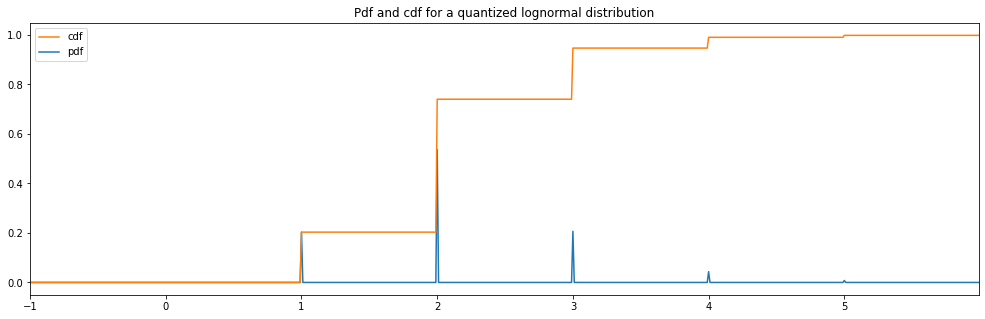

In [16]:
quantized_hyperparameter_space = HyperparameterSpace({
    "quantized lognormal": Quantized(LogNormal(1.0, 0.5))
})
plot_distribution_space(quantized_hyperparameter_space, num_bins=DISCRETE_NUM_BINS)


## Creating your own distributions

Why would we limit our users to use just the pre-made distributions?!
It's easier than it looks! Here is for example how the RandInt distribution is coded: 

In [17]:
class RandInt(DiscreteHyperparameterDistribution):
    """Get a random integer within a range"""

    def __init__(self, min_included: int, max_included: int, null_default_value: int = None):
        """
        Create a quantized random uniform distribution.
        A random integer between the two values inclusively will be returned.

        :param min_included: minimum integer, included.
        :param max_included: maximum integer, included.
        :param null_default_value: null default value for distribution. if None, take the min_included
        :type null_default_value: int
        """
        if null_default_value is None:
            DiscreteHyperparameterDistribution.__init__(self, min_included)
        else:
            DiscreteHyperparameterDistribution.__init__(self, null_default_value)

        self.min_included = min_included
        self.max_included = max_included

    def probabilities(self):
        values = self.values()
        return [1 / len(values) for _ in values]

    def values(self):
        return [i for i in range(self.min_included, self.max_included + 1)]

    def rvs(self) -> int:
        """
        Will return an integer in the specified range as specified at creation.

        :return: an integer.
        """
        return random.randint(self.min_included, self.max_included)

    def pdf(self, x) -> float:
        """
        Calculate the random int mass function value at position `x`.
        :param x: value where the probability mass function is evaluated.
        :return: value of the probability mass function.
        """

        possible_values = set(range(self.min_included, self.max_included + 1))
        if (isinstance(x, int) or x.is_integer()) and x in possible_values:
            return 1 / (self.max_included - self.min_included + 1)

        return 0.

    def cdf(self, x) -> float:
        """
        Calculate the random int cumulative distribution function value at position `x`.
        :param x: value where the cumulative distribution function is evaluated.
        :return: value of the cumulative distribution function.
        """
        if x < self.min_included:
            return 0.

        if x > self.max_included:
            return 1.

        return (math.floor(x) - self.min_included + 1) / (self.max_included - self.min_included + 1)

    def min(self):
        """
        Calculate minimum value that can be sampled in the randint distribution.

        :return: minimal value return from distribution.
        """
        return self.min_included

    def max(self):
        """
        Calculate maximal value that can be sampled in the randint distribution.

        :return: maximal value return from distribution.
        """
        return self.max_included

    def mean(self):
        """
        Calculate mean value (also called esperance) of the random variable.

        :return: mean value of the random variable.
        """
        return (self.max_included + self.min_included) / 2

    def var(self):
        """
        Calculate variance value of the random variable.

        :return: variance value of the random variable.
        """
        return ((self.max_included - self.min_included + 1) ** 2 - 1) / 12

## Using Scipy Distributions

Scipy distributions are directly compatible with neuraxle ! Feel free to use them inside your hyperparameter spaces.

In [18]:
from neuraxle.base import Identity
from scipy.stats import norm, randint, gamma, uniform

hyperparams_space = HyperparameterSpace({
   'rand_int_scipy': randint(low=2, high=5),
   'gamma_scipy': gamma(0.2),
   'uniform_scipy': uniform(0, 10)
})

print(hyperparams_space.rvs())

HyperparameterSamples([('rand_int_scipy', <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe8f3f3e290>), ('gamma_scipy', <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe8f2b28410>), ('uniform_scipy', <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe8f3f3e950>)])


## Creating your own distributions using scipy 

You can also use scipy BaseCustomContinuousScipyDistribution, and BaseCustomDiscreteScipyDistribution to avoid a lot of boilerplate code like min, max, mean, and var methods.

### BaseCustomContinuousScipyDistribution

In [19]:
from neuraxle.hyperparams.scipy_distributions import BaseCustomContinuousScipyDistribution, BaseCustomDiscreteScipyDistribution

class Normal(BaseCustomContinuousScipyDistribution):
    """
    Normal distribution that wraps a `continuous scipy distribution <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous>`_
    """

    def __init__(
            self,
            mean: float,
            std: float,
            hard_clip_min: float = None,
            hard_clip_max: float = None,
            null_default_value: float = None
    ):
        super().__init__(
            name='normal',
            min_included=hard_clip_min,
            max_included=hard_clip_max,
            null_default_value=null_default_value
        )

        self.hard_clip_min = hard_clip_min
        self.hard_clip_max = hard_clip_max
        self.mean = mean
        self.std = std

    def _pdf(self, x) -> float:
        """
        Calculate the Normal probability distribution value at position `x`.
        :param x: value where the probability distribution function is evaluated.
        :return: value of the probability distribution function.
        """

        if self.hard_clip_min is not None and (x < self.hard_clip_min):
            return 0.

        if self.hard_clip_max is not None and (x > self.hard_clip_max):
            return 0.

        if self.hard_clip_min is not None or self.hard_clip_max is not None:
            a = -np.inf
            b = np.inf

            if self.hard_clip_min is not None:
                a = (self.hard_clip_min - self.mean) / self.std

            if self.hard_clip_max is not None:
                b = (self.hard_clip_max - self.mean) / self.std

            return truncnorm.pdf(x, a=a, b=b, loc=self.mean, scale=self.std)

        return norm.pdf(x, loc=self.mean, scale=self.std)

In [20]:
hyperparameter_space = HyperparameterSpace({
    "normal": Normal(mean=0.0, std=2.0, hard_clip_min=-3.0, hard_clip_max=3.0)
})
print(hyperparameter_space.rvs())

HyperparameterSamples([('normal', -1.4669749077021386)])


### BaseCustomDiscreteScipyDistribution

In [21]:
from scipy.special import factorial


class Poisson(BaseCustomDiscreteScipyDistribution):
    """
    Poisson distribution that inherits from `scipy.stats.rv_discrete <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_histogram.html#scipy.stats.rv_histogram>`_
    """

    def __init__(self, min_included: float, max_included: float, null_default_value: float = None, mu=0.6):
        super().__init__(
            min_included=min_included,
            max_included=max_included,
            name='poisson',
            null_default_value=null_default_value
        )
        self.mu = mu

    def _pmf(self, x):
        return math.exp(-self.mu) * self.mu ** x / factorial(x)


In [26]:
hyperparameter_space = HyperparameterSpace({
    "poisson": Poisson(0.0, 10.0)
})
print(hyperparameter_space.rvs())

HyperparameterSamples([('poisson', 2)])
